3)\
Import libraries

In [12]:
import numpy as np  
import cv2
from matplotlib import pyplot as plt 

Define compute norm rgb histogram() function

In [13]:
def compute_norm_rgb_histogram(I):
    # Function to compute the histogram binning of input
    # RGB image. Each channel is binned into a 32 length
    # vector.
    hist_red = np.zeros((1,32))
    hist_green = np.zeros((1,32))
    hist_blue = np.zeros((1,32))
    I = I/8
    I = I.astype(int)
    I = I.reshape((I.shape[0]*I.shape[1], 3))
    for i in range(I.shape[0]):
        hist_red[0,I[i,0]] = hist_red[0,I[i,0]] + 1
        hist_green[0,I[i,1]] = hist_green[0,I[i,1]] + 1
        hist_blue[0,I[i,2]] = hist_blue[0,I[i,2]] + 1
    # Normalize values
    hist_red = hist_red/np.sum(hist_red)
    hist_green = hist_green/np.sum(hist_green)
    hist_blue = hist_blue/np.sum(hist_blue)
    return np.hstack((hist_red, hist_green, hist_blue)).ravel()

Main driver to load images

In [14]:
A = cv2.imread('/home/parth/work/UCSD/Fall 2021/ECE 253 Image Processing/Assignment 1/geisel.jpg')
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)
hist = compute_norm_rgb_histogram(A)

Plot histogram with R,G & B channels adjacent to each other

<function matplotlib.pyplot.show(close=None, block=None)>

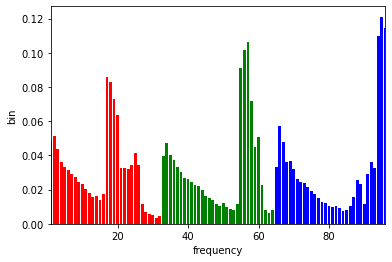

In [15]:
r = np.repeat(np.array(['red']),32)
g = np.repeat(np.array(['green']),32)
b = np.repeat(np.array(['blue']),32)
c = np.hstack((r,g,b)).ravel() 
plt.bar(np.arange(1,97), hist, color = c)
plt.xlim((1,96))
plt.xlabel('frequency')
plt.ylabel('bin')
plt.show

Plot histogram with R,G & B channels overlapping on one another.

<function matplotlib.pyplot.show(close=None, block=None)>

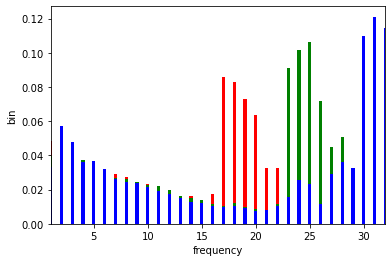

In [16]:
plt.bar(np.arange(1,33), hist[0:32], color = 'r', width = 0.3)
plt.bar(np.arange(1,33), hist[32:64], color = 'g', width = 0.3)
plt.bar(np.arange(1,33), hist[64:96], color = 'b', width = 0.3)
plt.xlim((1,32))
plt.xlabel('frequency')
plt.ylabel('bin')
plt.show